## CURIE

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
increasing_df = pd.read_clipboard()

In [4]:
decreasing_df = pd.read_clipboard()

In [5]:
increasing_df = increasing_df[["Temperatura", "Napięcie", "zakres grzanie"]]
increasing_df

,Temperatura,Napięcie,zakres grzanie
0,22,0.4500,2.0
1,25,0.4400,2.0
2,26,0.4270,2.0
3,27,0.4270,2.0
4,28,0.4260,2.0
...,...,...,...
120,200,0.0279,0.2
121,201,0.0283,0.2
122,202,0.0276,0.2
123,203,0.0269,0.2


In [6]:
decreasing_df.columns = ["zakres chlodzenie", "Napięcie", "Temperatura"]
decreasing_df.dropna(inplace=True)
decreasing_df

,zakres chlodzenie,Napięcie,Temperatura
18,2.0,0.4240,42
24,2.0,0.4240,48
30,2.0,0.4260,54
35,2.0,0.4240,60
38,2.0,0.4250,66
41,2.0,0.4240,72
44,2.0,0.4250,78
47,2.0,0.4240,84
50,2.0,0.4230,90
53,2.0,0.4220,96


In [7]:
decreasing_df.columns = ["zakres", "Napięcie", "Temperatura"]
increasing_df.columns = ["Temperatura", "Napięcie", "zakres"]

In [9]:
increasing_df["u_err"] = increasing_df.apply(
    lambda x: (x["Napięcie"] * 0.008 + 3 * (0.001 if x["zakres"] == 2 else 0.0001))
    / np.sqrt(3),
    axis=1,
)
decreasing_df["u_err"] = decreasing_df.apply(
    lambda x: (x["Napięcie"] * 0.008 + 3 * (0.001 if x["zakres"] == 2 else 0.0001))
    / np.sqrt(3),
    axis=1,
)
# increasing_df

In [10]:
# inc_yerr = increasing_df["zakres"] / 100 * 0.5 / np.sqrt(3)
# inc_yerr = increasing_df["zakres"] * 0.008 + 3 * (0.001 if increasing_df["zakres"] ==  2 else 0.0001)
# inc_yerr /= np.sqrt(3)
inc_xerr = 1 / np.sqrt(3)

# dec_yerr = decreasing_df["zakres"] / 100 * 0.5 / np.sqrt(3)
# dec_yerr = decreasing_df["zakres"] * 0.8% + 3 * (0.001 if decreasing_df["zakres"] ==  2 else 0.0001)
# dec_yerr /= np.sqrt(3)
dec_xerr = 1 / np.sqrt(3)

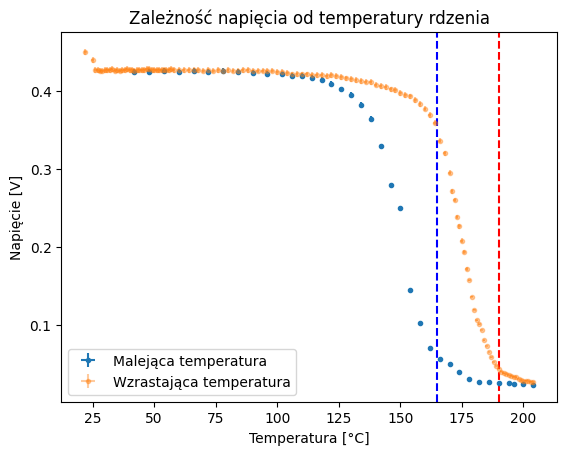

In [118]:
plt.errorbar(
    decreasing_df["Temperatura"],
    decreasing_df["Napięcie"],
    xerr=dec_xerr,
    yerr=decreasing_df["u_err"],
    fmt=".",
    label="Malejąca temperatura",
)
plt.errorbar(
    increasing_df["Temperatura"],
    increasing_df["Napięcie"],
    xerr=inc_xerr,
    yerr=increasing_df["u_err"],
    fmt=".",
    label="Wzrastająca temperatura",
    alpha=0.4,
)
plt.xlabel("Temperatura [°C]")
plt.ylabel("Napięcie [V]")
# add vertical line
# plt.axvline(x=165, color='r', linestyle='--')
plt.axvline(x=190, color="r", linestyle="--")
# plt.axvline(x=130, color='b', linestyle='--')
plt.axvline(x=165, color="b", linestyle="--")


plt.title("Zależność napięcia od temperatury rdzenia")
plt.legend()

In [19]:
decreasing_df = decreasing_df[["Temperatura", "Napięcie", "zakres"]]

In [11]:
increasing_df2 = increasing_df[increasing_df["Temperatura"] >= 165].copy()
increasing_df2 = increasing_df2[increasing_df2["Temperatura"] <= 190]
# increasing_df2 = increasing_df[increasing_df["Temperatura"] >= 170].copy()

decreasing_df2 = decreasing_df[decreasing_df["Temperatura"] >= 130].copy()
decreasing_df2 = decreasing_df2[decreasing_df2["Temperatura"] <= 165]
increasing_df2["t_err"] = 1 / np.sqrt(3)
decreasing_df2["t_err"] = 1 / np.sqrt(3)
# increasing_df2, decreasing_df2

In [12]:
def niep(a, b, stda, stdb):
    return np.sqrt((1 / a) ** 2 * stdb**2 + (b / a**2) ** 2 * stda**2)

-0.011070416666666675 1.8735697222222234
a:-0.011070416666666675, b:1.8735697222222234, stda:0.0009245646274494549, stdb:0.13532375464573423
18.68707750164233
169.2411206042129


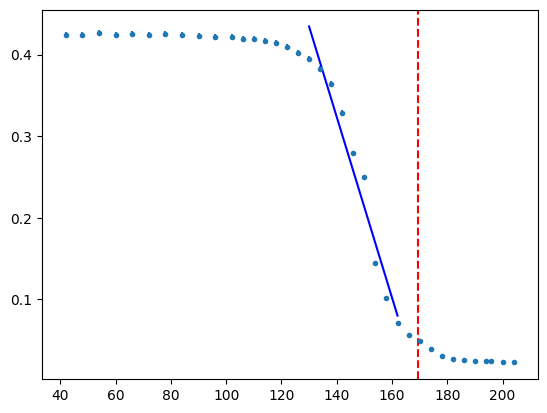

In [13]:
plt.errorbar(
    decreasing_df["Temperatura"],
    decreasing_df["Napięcie"],
    xerr=dec_xerr,
    yerr=decreasing_df["u_err"],
    fmt=".",
    label="Malejąca temperatura",
)
(a, b), cov = np.polyfit(
    decreasing_df2["Temperatura"], decreasing_df2["Napięcie"], 1, cov=True
)
plt.plot(
    decreasing_df2["Temperatura"],
    [a * x + b for x in decreasing_df2["Temperatura"]],
    color="b",
)
plt.axvline(x=-b / a, color="r", linestyle="--")
print(a, b)
print(f"a:{a}, b:{b}, stda:{np.sqrt(cov[0,0])}, stdb:{np.sqrt(cov[1,1])}")
# print(np.sqrt(cov[0,0]), np.sqrt(cov[1,1]))
print(niep(a, b, np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1])))
print(-b / a)

a:-0.013279560634103158, b:2.5339396716826257, stda:0.00047820832179006805, stdb:0.08559969614041532
9.421617546250388
190.81502329039643


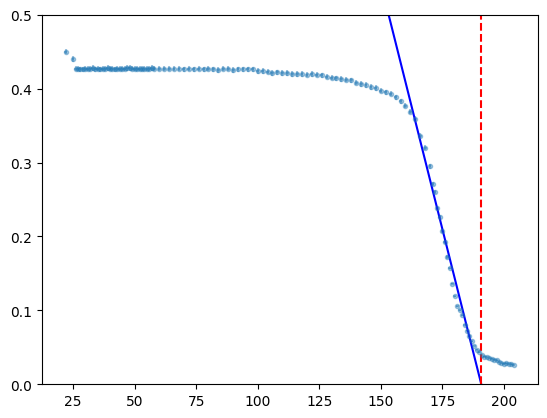

In [14]:
plt.errorbar(
    increasing_df["Temperatura"],
    increasing_df["Napięcie"],
    xerr=inc_xerr,
    yerr=increasing_df["u_err"],
    fmt=".",
    label="Wzrastająca temperatura",
    alpha=0.4,
)
(a, b), cov = np.polyfit(
    increasing_df2["Temperatura"], increasing_df2["Napięcie"], 1, cov=True
)
plt.plot(
    increasing_df["Temperatura"],
    [a * x + b for x in increasing_df["Temperatura"]],
    color="b",
)
plt.ylim(0, 0.5)
plt.axvline(x=-b / a, color="r", linestyle="--")
print(f"a:{a}, b:{b}, stda:{np.sqrt(cov[0,0])}, stdb:{np.sqrt(cov[1,1])}")
# print(np.sqrt(cov[0,0]), np.sqrt(cov[1,1]))
print(niep(a, b, np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1])))
# print(a,b)
print(-b / a)

a: 0.8315559640957234, b: -139.3408391270534, std(a): 0.06770553175992955, std(b): 12.119347743637649
19.963718797980487
167.5663997895557


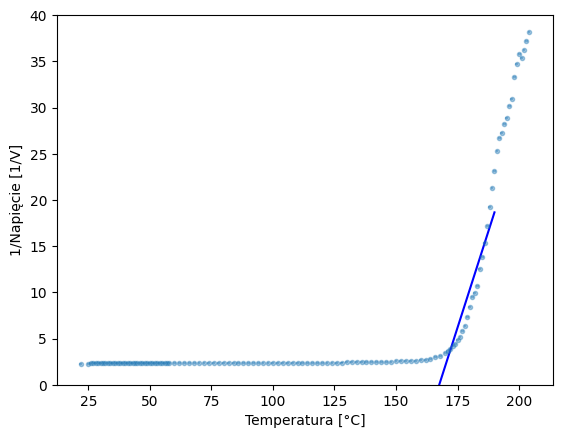

In [119]:
plt.errorbar(
    increasing_df["Temperatura"],
    1 / increasing_df["Napięcie"],
    xerr=inc_xerr,
    yerr=increasing_df["u_err"],
    fmt=".",
    label="Wzrastająca temperatura",
    alpha=0.4,
)
(a, b), cov = np.polyfit(
    increasing_df2["Temperatura"], 1 / increasing_df2["Napięcie"], 1, cov=True
)
plt.plot(
    increasing_df2["Temperatura"],
    [a * x + b for x in increasing_df2["Temperatura"]],
    color="b",
)
plt.ylim(0, 40)
plt.xlabel("Temperatura [°C]")
plt.ylabel("1/Napięcie [1/V]")
t_cg = -b / a
# plt.axvline(x = t_cg, color="r", linestyle="--")

print(f"a: {a}, b: {b}, std(a): {np.sqrt(cov[0,0])}, std(b): {np.sqrt(cov[1,1])}")
s1 = niep(a, b, np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]))
print(niep(a, b, np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1])))
print(t_cg)

a: 0.32305765686319166, b: -41.671618452629026, std(a): 0.06961013394360373, std(b): 10.18847618324648
42.0373080028592
128.9912731283014


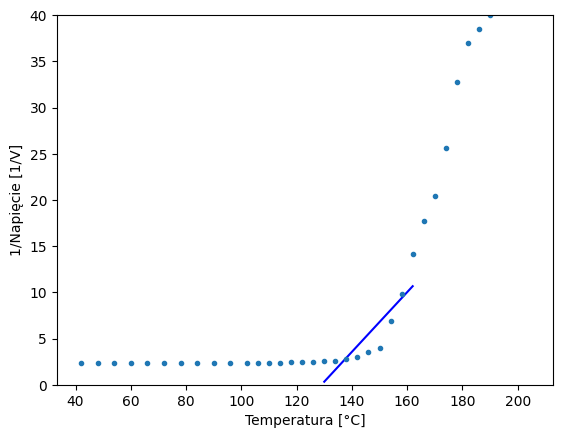

In [120]:
plt.errorbar(
    decreasing_df["Temperatura"],
    1 / decreasing_df["Napięcie"],
    xerr=dec_xerr,
    yerr=decreasing_df["u_err"],
    fmt=".",
    label="Malejąca temperatura",
)
(a, b), cov = np.polyfit(
    decreasing_df2["Temperatura"], 1 / decreasing_df2["Napięcie"], 1, cov=True
)
plt.plot(
    decreasing_df2["Temperatura"],
    [a * x + b for x in decreasing_df2["Temperatura"]],
    color="b",
)
plt.ylim(0, 40)
plt.xlabel("Temperatura [°C]")
plt.ylabel("1/Napięcie [1/V]")
t_cc = -b / a
# plt.axvline(x = t_cc, color="r", linestyle="--")
print(f"a: {a}, b: {b}, std(a): {np.sqrt(cov[0,0])}, std(b): {np.sqrt(cov[1,1])}")
s2 = niep(a, b, np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]))
print(niep(a, b, np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1])))
# print(a,b)
print(t_cc)

In [122]:
np.sqrt(s1**2 + s2**2), (t_cc + t_cg) / 2

(46.536924397429715, 148.27883645892854)

In [15]:
np.sqrt(19**2 + 9.4**2), (169 + 190.8) / 2

(21.19811312357777, 179.9)

1.208503924618308 -208.64394966765002
[[ 4.63365445e-03 -8.45641936e-01]
 [-8.45641936e-01  1.54428119e+02]]
172.64648084080306


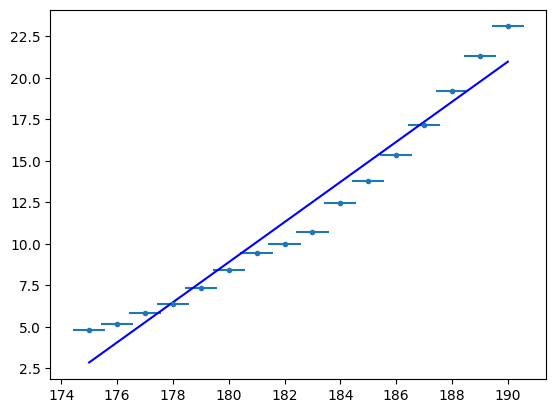

In [58]:
plt.errorbar(
    increasing_df2["Temperatura"],
    1 / increasing_df2["Napięcie"],
    xerr=increasing_df2["t_err"],
    yerr=increasing_df2["u_err"],
    fmt=".",
    label="Wzrastająca temperatura",
)
(a, b), cov = np.polyfit(
    increasing_df2["Temperatura"], 1 / increasing_df2["Napięcie"], 1, cov=True
)
plt.plot(
    increasing_df2["Temperatura"],
    [a * x + b for x in increasing_df2["Temperatura"]],
    color="b",
)
print(a, b)
print(cov)
print(-b / a)